In [1]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# load dataset
dataset = read_csv("sonar.csv", header=None)

In [3]:
# shape
print(dataset.shape)

(208, 61)


In [4]:
# head
print(dataset.head(20))

        0       1       2       3       4       5       6       7       8   \
0   0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1   0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2   0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3   0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4   0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
5   0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
6   0.0317  0.0956  0.1321  0.1408  0.1674  0.1710  0.0731  0.1401  0.2083   
7   0.0519  0.0548  0.0842  0.0319  0.1158  0.0922  0.1027  0.0613  0.1465   
8   0.0223  0.0375  0.0484  0.0475  0.0647  0.0591  0.0753  0.0098  0.0684   
9   0.0164  0.0173  0.0347  0.0070  0.0187  0.0671  0.1056  0.0697  0.0962   
10  0.0039  0.0063  0.0152  0.0336  0.0310  0.0284  0.0396  0.0272  0.0323   
11  0.0123  0.0309  0.0169  0.0313  0.0358  0.0102  0.0182  0.05

In [6]:
# class distribution Rock & Mines
print(dataset.groupby(60).size())

60
M    111
R     97
dtype: int64


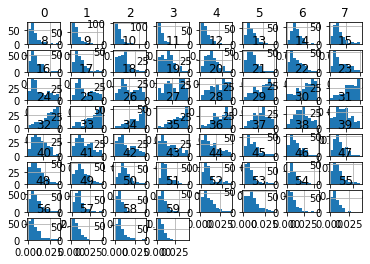

In [9]:
# histograms
dataset.hist()
pyplot.show()

In [12]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:60]
y = array[:,60]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [13]:
# Spot Check 6 Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.752083 (0.087122)
LDA: 0.715278 (0.103733)
KNN: 0.798121 (0.101886)
CART: 0.677941 (0.146693)
NB: 0.705719 (0.079095)
SVM: 0.561070 (0.044757)


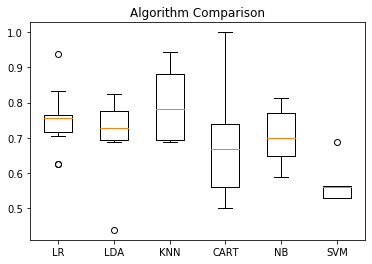

In [14]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [16]:
# Make predictions on validation dataset
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [17]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7142857142857143
[[16  4]
 [ 8 14]]
              precision    recall  f1-score   support

           M       0.67      0.80      0.73        20
           R       0.78      0.64      0.70        22

    accuracy                           0.71        42
   macro avg       0.72      0.72      0.71        42
weighted avg       0.72      0.71      0.71        42

